In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import PercentFormatter
from scipy.stats import linregress
from scipy.stats import norm
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.dpi'] = 150  # Set the figure dpi to 150 globally
plt.rcParams['font.family'] = 'serif' #Change font to Times New Roman
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
%matplotlib inline

## Functions

In [398]:
def analyse(*particle_paths):
    particle_data = {}

    for i, path in enumerate(particle_paths, start=1):
        column_names = [f'x_{i}', f'y_{i}']
        data = pd.read_csv(path, skiprows=1, usecols=[5, 6], header=None, names=column_names)
        particle_data[f'x_{i}'] = data[column_names[0]].values
        particle_data[f'y_{i}'] = data[column_names[1]].values

    return particle_data

def brownian_gen_and_time_analysis(x, y, t):
    # Plot the trajectory
    #delta_rs = np.array([])
    x = x - x[0]
    y = y - y[0]
    plt.figure(figsize=(6, 6))
    plt.plot(0, 0, 'go', ms=10, label='Start Point')
    plt.plot(x[-1], y[-1], 'ro', ms=10, label='End Point')
    plt.plot(x, y, c='navy', linewidth=0.7)
    plt.xlabel('X ($\mu m$)')
    plt.ylabel('Y ($\mu m$)')
    plt.legend()
    """plt.savefig(f"D:/Semester 5/Lab 4/Brownian Motion/trajectory.pdf", dpi=300,
                    bbox_inches="tight", transparent=True)"""
    plt.show()

    # Convert units
    x = x * 1e-6
    y = y * 1e-6

    # Calculate r2
    r2 = x**2 + y**2
    
    #r = np.sqrt(r2)
    delta_r = np.diff(x)
    #print('delta_x =', ', '.join(map(str, delta_x))) 

    # Plot r2 over time
    plt.plot(t[:len(r2)], r2, c='navy', linewidth=0.7)
    plt.xlabel('Time (s)')
    plt.ylabel(r'$r^2$ $(m^2)$')
    plt.show()

    # Fit a linear function to obtain m and c
    m, c = np.polyfit(t[:len(r2)], r2, 1)

    # Calculate k_B
    eta = 8.9e-4  # viscosity
    a = 1.5e-6  # particle radius
    T = 298  # temperature
    k_B = (6 * np.pi * eta * m * a) / (4 * T)
    print('k_B =', k_B)

    # Divide data into slices
    num_slices = 10

    # Use list comprehension to create the slices
    x_slices = [x[i * 10 : (i + 1) * 10] for i in range(num_slices)]
    y_slices = [y[i * 10 : (i + 1) * 10] for i in range(num_slices)]

    # Convert the list to a NumPy array
    x_vals = np.array(x_slices)
    y_vals = np.array(y_slices)

    # Subtract the first value of each slice from the entire slice
    x_vals -= x_vals[:, :1]
    y_vals -= y_vals[:, :1]
    
    std_x = np.std(x_vals, axis=0)
    std_y = np.std(y_vals, axis=0)

    # Calculate r2_vals
    r2_vals = x_vals**2 + y_vals**2
    
    std_r2 = np.std(r2_vals, axis=0)/ np.sqrt(num_slices)
    
    delta_r_squared_slices = np.sqrt((2 * x_vals * std_x)**2 + (2 * y_vals * std_y)**2)

    # Calculate the mean and standard deviation of delta_r_squared
    delta_r_squared_mean = np.mean(delta_r_squared_slices, axis=0)
    delta_r_squared_sem = np.std(delta_r_squared_slices, axis=0) / np.sqrt(num_slices)

    # Print or plot the results as needed
    #print(r2_vals)
    r2_mean = np.mean(r2_vals, axis=0)
    
    m,c = np.polyfit(t[:10], r2_mean,1)
    r2_mean_2 = [m*i + c for i in t[:10]]
    # Plot the mean values
    plt.errorbar(t[:10], r2_mean, yerr = delta_r_squared_sem,linewidth=0.7, label='Data with errorbars', capsize = 3)
    plt.plot(t[:10], r2_mean, c='navy', marker ='o' ,linewidth=0.7)
    plt.plot(t[:10], r2_mean_2, c='r' ,linewidth=1, label=f'Best Fit Line with slope: {m:.3e}')
    plt.xlabel('Time (s)')
    plt.ylabel(r'$\langle r^2 \rangle$ $(m^2)$')
    plt.legend()
    plt.savefig(f"D:/Semester 5/Lab 4/Brownian Motion/time_ensemble.pdf", dpi=300,
                    bbox_inches="tight", transparent=True)
    plt.show()
    
    slope, intercept, r, p, se = linregress(t[:10], r2_mean)
    result = linregress(t[:10], r2_mean)
    print(result.slope, result.stderr, result.intercept, result.intercept_stderr)

    eta = 8.9e-4 #value from https://wiki.anton-paar.com/en/water/ at 25 degree C
    a = 1.5e-6
    T = 298
    k_B = (6*np.pi*eta*m*a)/(4*T)
    print('k_B=',k_B)
    error = np.abs((1.380649e-23 - k_B) / 1.380649e-23)*100
    print('error =', error,'%')
    D = (k_B * T) / (6 * np.pi * eta * a)
    print('D=',D)

    delta_D = D*(result.stderr/result.slope)
    print('delta_D=',delta_D)
    
    delta_eta_perc = 0.02
    delta_T = 2 
    delta_kB = k_B * np.sqrt((delta_eta_perc)**2 + (delta_D/D)**2 + (delta_T/T)**2)
    print('delta_kB=',delta_kB)
    
    return delta_r

## General and Time Ensemble

Results for Particle 1:


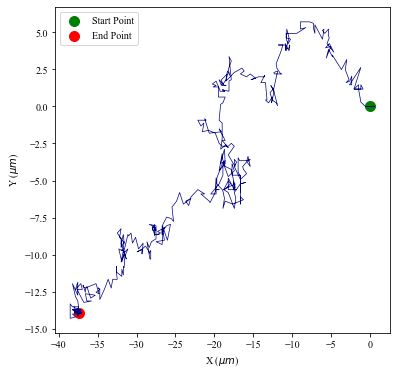

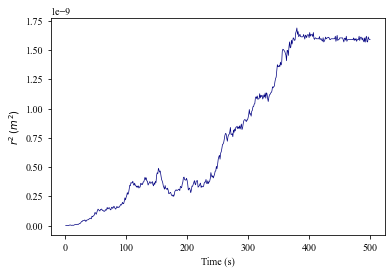

k_B = 8.387257639788143e-23


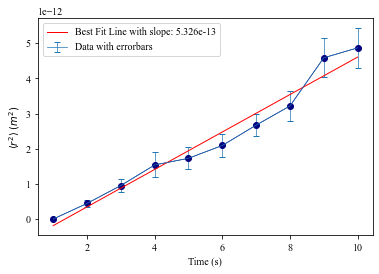

5.326452042424253e-13 3.506786217112368e-14 -7.196513733333398e-13 2.175903625031166e-13
k_B= 1.1244603714386647e-23
error = 18.55566683214455 %
D= 1.3316130106060632e-13
delta_D= 8.76696554278092e-15
delta_kB= 7.773899888782667e-25


Results for Particle 2:


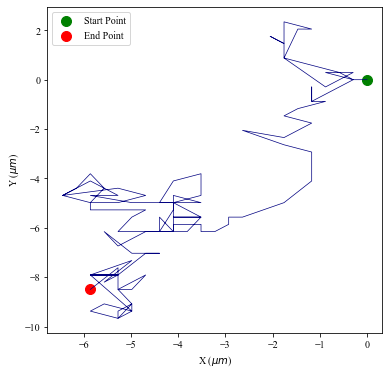

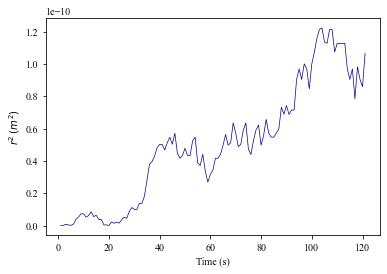

k_B = 2.06320631280481e-23


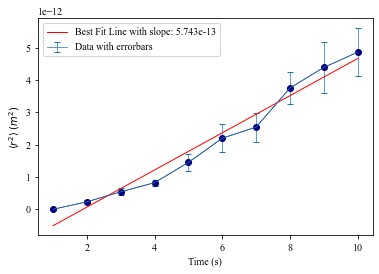

5.743327484848503e-13 3.762094373298477e-14 -1.0804785466666671e-12 2.33431816990263e-13
k_B= 1.212466404553849e-23
error = 12.181415801275422 %
D= 1.4358318712121257e-13
delta_D= 9.405235933246193e-15
delta_kB= 8.343833264026448e-25


Results for Particle 3:


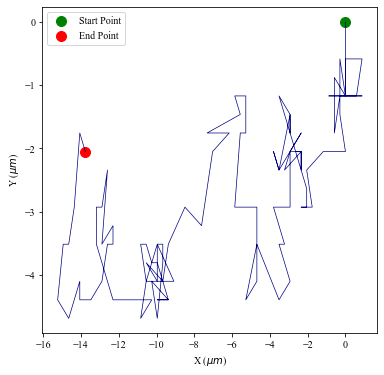

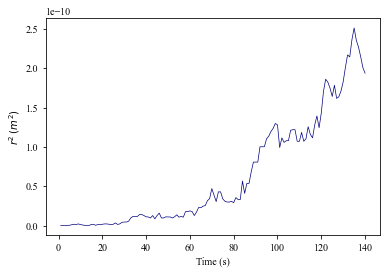

k_B = 3.312929733251152e-23


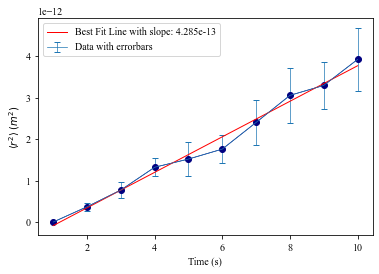

4.28493155151515e-13 1.6288965179416204e-14 -5.145684933333316e-13 1.01070370953732e-13
k_B= 9.045863335724379e-24
error = 34.4810785672218 %
D= 1.0712328878787873e-13
delta_D= 4.072241294854051e-15
delta_kB= 3.9327637340564874e-25


Results for Particle 4:


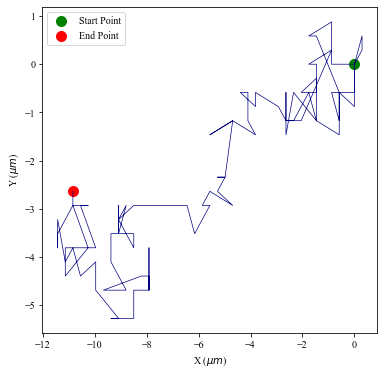

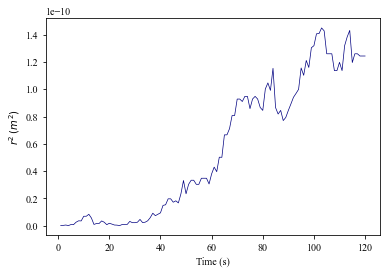

k_B = 2.9061543440284845e-23


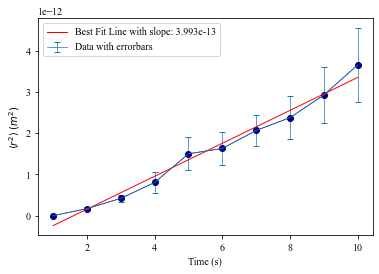

3.993389612121213e-13 2.014232554408199e-14 -6.403202266666665e-13 1.2497984323668137e-13
k_B= 8.430392934696135e-24
error = 38.938912535364636 %
D= 9.983474030303028e-14
delta_D= 5.035581386020496e-15
delta_kB= 4.6091609915002695e-25


Results for Particle 5:


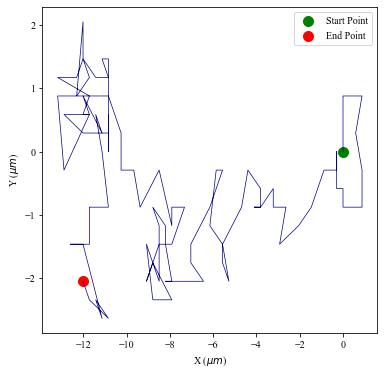

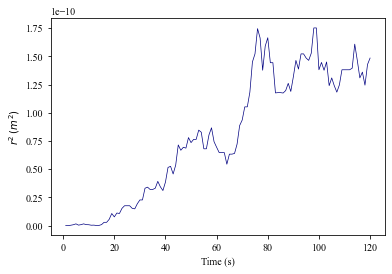

k_B = 3.2081238366522777e-23


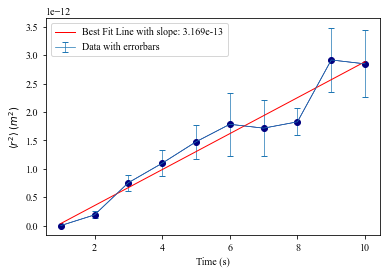

3.1688696787878696e-13 2.63231336769805e-14 -2.80922573333342e-13 1.6333074913555966e-13
k_B= 6.68975961422298e-24
error = 51.54626835478836 %
D= 7.92217419696967e-14
delta_D= 6.580783419245122e-15
delta_kB= 5.733447287819561e-25


Results for Particle 6:


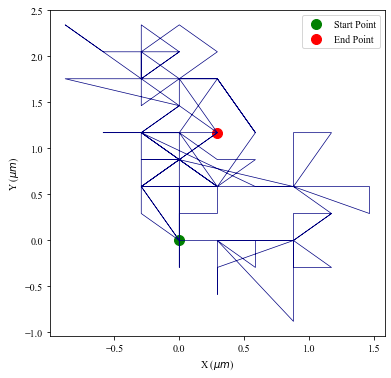

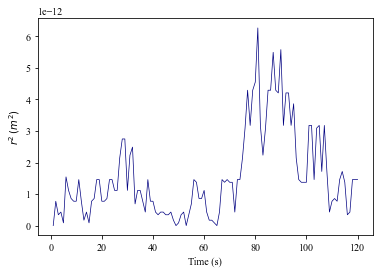

k_B = 3.520602845235115e-25


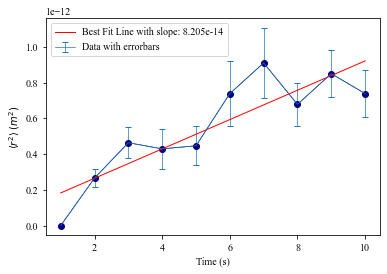

8.205083212121181e-14 1.5921044764748063e-14 1.0072949333333506e-13 9.878748481686737e-14
k_B= 1.732164458236205e-24
error = 87.45398390006291 %
D= 2.051270803030295e-14
delta_D= 3.980261191187015e-15
delta_kB= 3.380876989800234e-25


Results for Particle 7:


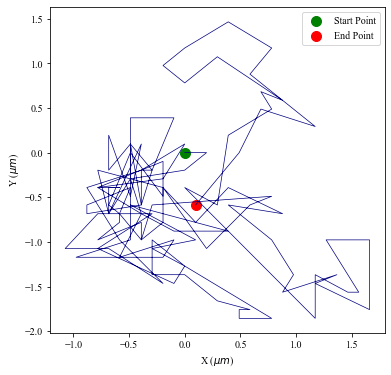

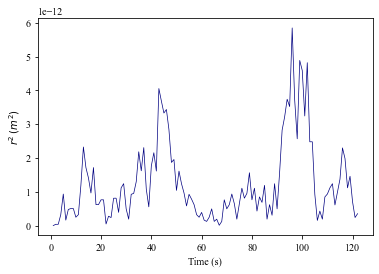

k_B = 1.7350288693630444e-25


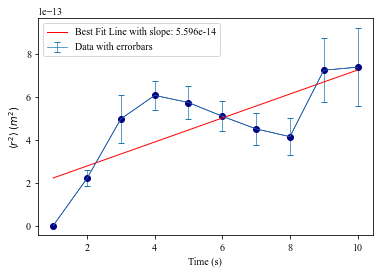

5.595698666666662e-14 1.7290808024327755e-14 1.660966933333346e-13 1.0728664232869369e-13
k_B= 1.1813006765222016e-24
error = 91.44387402937168 %
D= 1.3989246666666648e-14
delta_D= 4.322702006081936e-15
delta_kB= 3.6587370339646124e-25


Results for Particle 8:


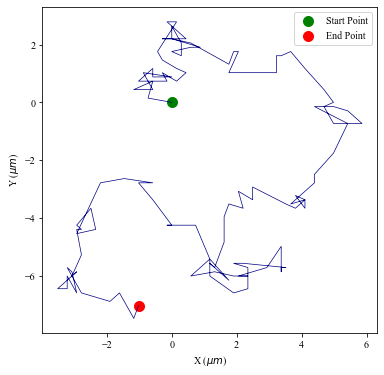

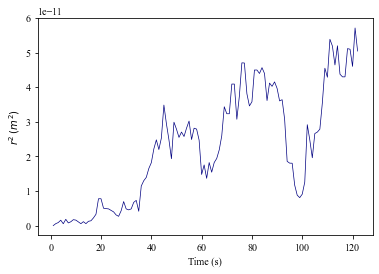

k_B = 7.929161735992959e-24


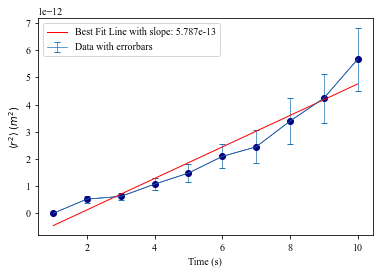

5.787441381818183e-13 5.3416920125151344e-14 -1.0313906000000005e-12 3.314432729635446e-13
k_B= 1.2217792320377053e-23
error = 11.506890452410046 %
D= 1.4468603454545454e-13
delta_D= 1.3354230031287831e-14
delta_kB= 1.1567586005071789e-24


Results for Particle 9:


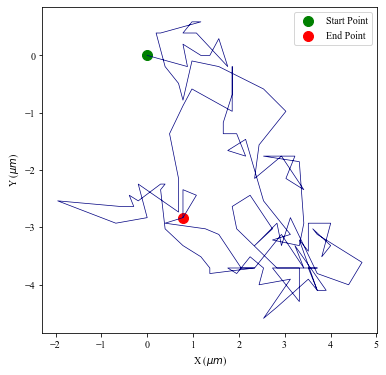

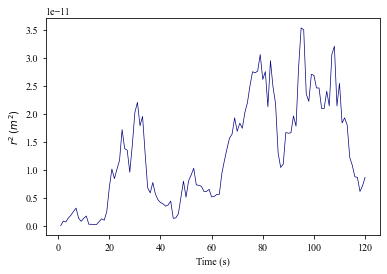

k_B = 3.796800285091405e-24


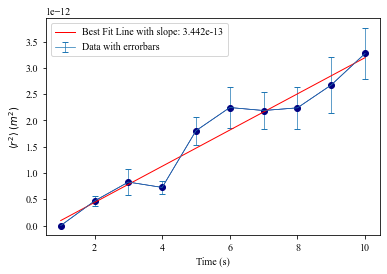

3.4417059090908805e-13 2.9546728866431914e-14 -2.4828177999998817e-13 1.8333263126949871e-13
k_B= 7.265740635782724e-24
error = 47.37445479783259 %
D= 8.6042647727272e-14
delta_D= 7.386682216607977e-15
delta_kB= 6.42313979558286e-25


Results for Particle 10:


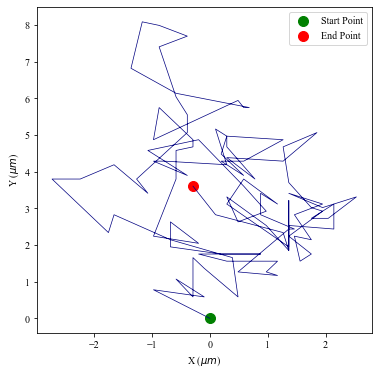

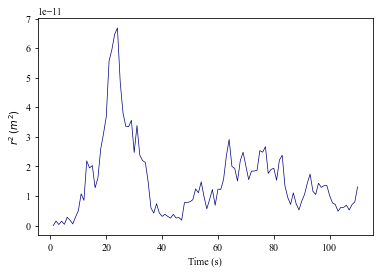

k_B = -1.5039981434933755e-24


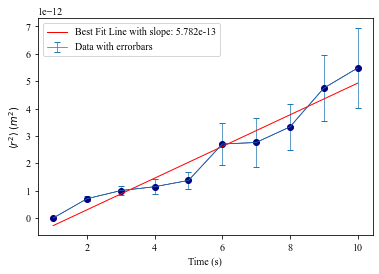

5.781531460606052e-13 4.990847754781943e-14 -8.559107933333292e-13 3.096739592683506e-13
k_B= 1.2205315962477959e-23
error = 11.597256344820748 %
D= 1.445382865151513e-13
delta_D= 1.2477119386954857e-14
delta_kB= 1.084617395488153e-24


Results for Particle 11:


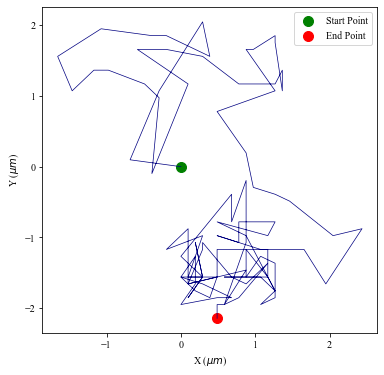

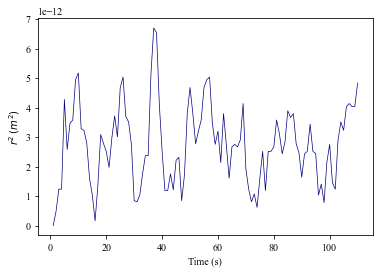

k_B = 2.0693200171209006e-26


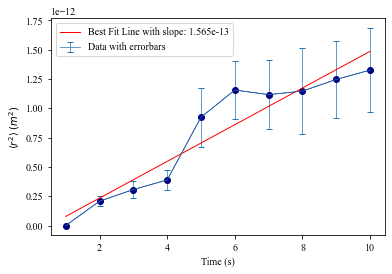

1.564615418181798e-13 1.81802234386166e-14 -7.829851999999474e-14 1.1280531984221283e-13
k_B= 3.3030392844513917e-24
error = 76.07618384939697 %
D= 3.911538545454494e-14
delta_D= 4.545055859654149e-15
delta_kB= 3.900745405760136e-25


Results for Particle 12:


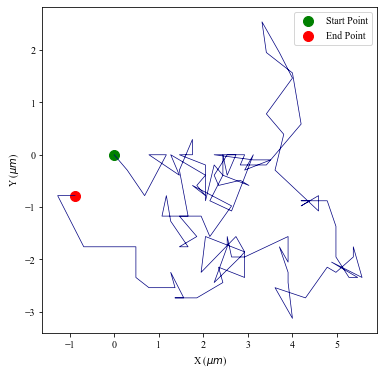

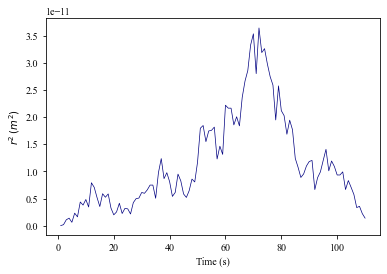

k_B = 2.4390127302547243e-24


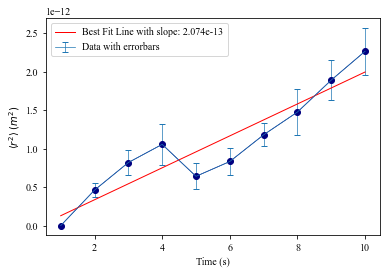

2.0736450121212258e-13 2.8712605079741073e-14 -7.915958666667733e-14 1.78157029282903e-13
k_B= 4.3776450477539925e-24
error = 68.29284598942968 %
D= 5.1841125303030626e-14
delta_D= 7.178151269935265e-15
delta_kB= 6.13142882820098e-25


Results for Particle 13:


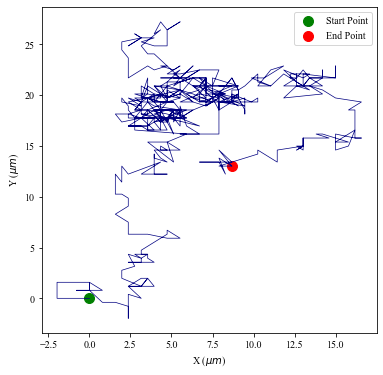

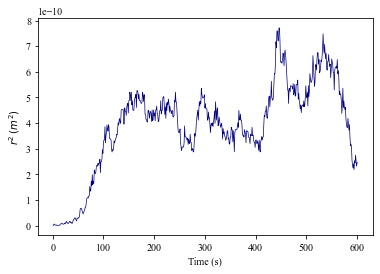

k_B = 1.439668974926942e-23


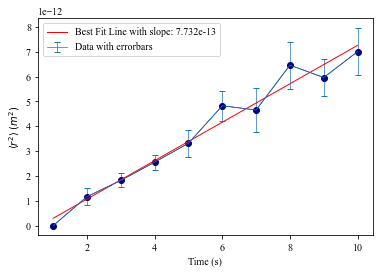

7.731824709090957e-13 4.803932936428637e-14 -4.77371160000006e-13 2.9807619979152964e-13
k_B= 1.6322554704399553e-23
error = 18.223782470414655 %
D= 1.9329561772727386e-13
delta_D= 1.2009832341071588e-14
delta_kB= 1.0710160138095915e-24


Results for Particle 14:


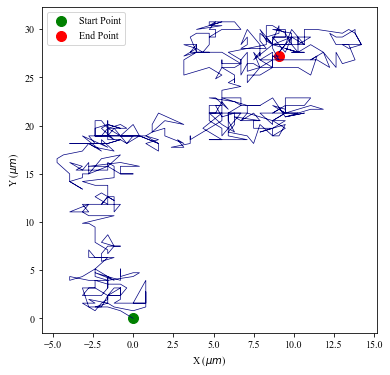

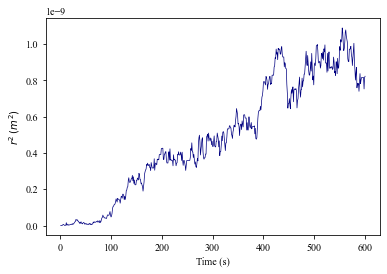

k_B = 3.754778963866689e-23


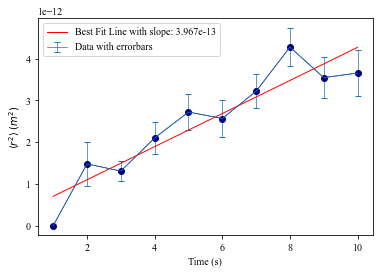

3.967208187878805e-13 5.5921811275638803e-14 3.0616496666666305e-13 3.469857138116846e-13
k_B= 8.375121670083356e-24
error = 39.33924067533924 %
D= 9.918020469697008e-14
delta_D= 1.3980452818909696e-14
delta_kB= 1.1937059580198395e-24


Results for Particle 15:


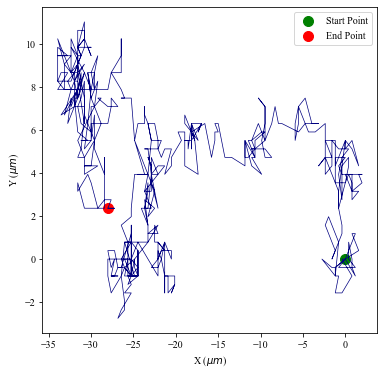

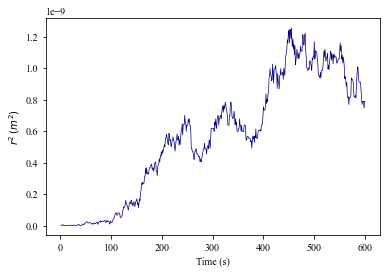

k_B = 4.350554206200088e-23


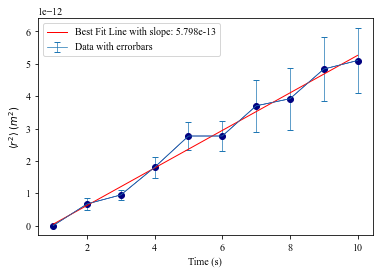

5.797853199999958e-13 2.3987070677982726e-14 -5.360450800000018e-13 1.4883585941854114e-13
k_B= 1.2239772574487635e-23
error = 11.347688119952036 %
D= 1.4494632999999893e-13
delta_D= 5.996767669495681e-15
delta_kB= 5.6842021220130275e-25


Results for Particle 16:


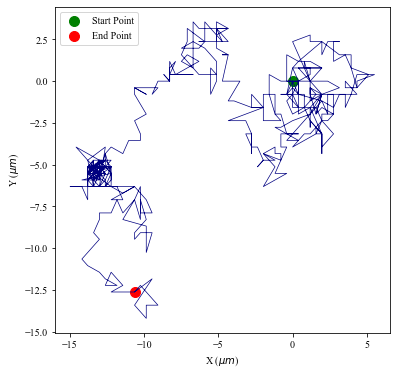

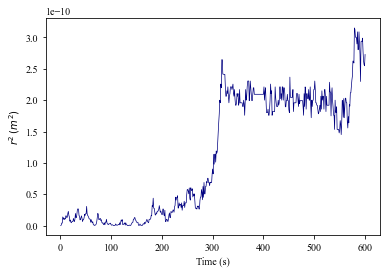

k_B = 1.050109722295534e-23


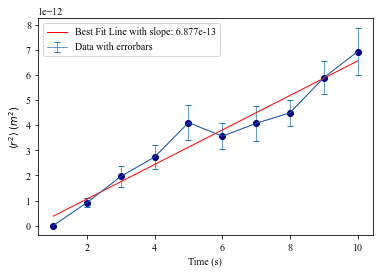

6.877139478787891e-13 5.6719695007006386e-14 -3.120059533333437e-13 3.5193645216854317e-13
k_B= 1.451823981735081e-23
error = 5.155182941868709 %
D= 1.719284869696972e-13
delta_D= 1.417992375175159e-14
delta_kB= 1.2359521311625079e-24


Results for Particle 17:


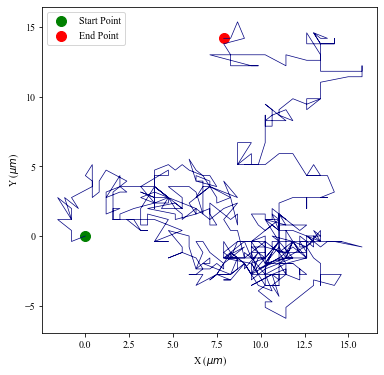

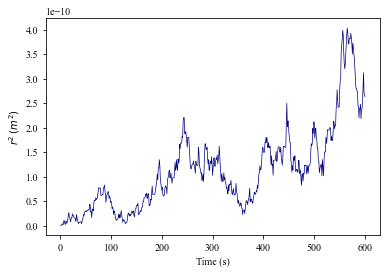

k_B = 8.219507716199833e-24


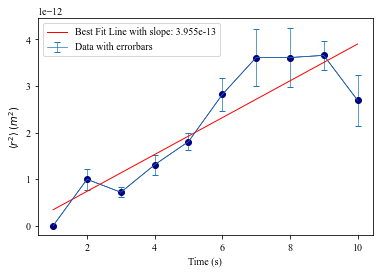

3.95486860606061e-13 6.96842811223333e-14 -5.419357333333511e-14 4.3237959349181887e-13
k_B= 8.349071739202217e-24
error = 39.52791955665621 %
D= 9.887171515151521e-14
delta_D= 1.7421070280583318e-14
delta_kB= 1.4816023370318638e-24


All Delta r Values:
[ 0.000e+00 -5.860e-07  1.172e-06 ... -3.950e-07 -3.940e-07  0.000e+00]


In [399]:
particle_paths = ["D:\Semester 5\Lab 4\Brownian Motion\SanjanaAbeer\Analysed_Data\Results1.csv", 
                  "D:\Semester 5\Lab 4\Brownian Motion\SanjanaAbeer\Analysed_Data\Results2.csv",
                  "D:\Semester 5\Lab 4\Brownian Motion\SanjanaAbeer\Analysed_Data\Results3.csv",
                  "D:\Semester 5\Lab 4\Brownian Motion\SanjanaAbeer\Analysed_Data\Results4.csv", 
                  "D:\Semester 5\Lab 4\Brownian Motion\SanjanaAbeer\Analysed_Data\Results5.csv",
                  "D:\Semester 5\Lab 4\Brownian Motion\SanjanaAbeer\Analysed_Data\Results6.csv",
                  "D:\Semester 5\Lab 4\Brownian Motion\SanjanaAbeer\Analysed_Data\Results7.csv", 
                  "D:\Semester 5\Lab 4\Brownian Motion\SanjanaAbeer\Analysed_Data\Results8.csv",
                  "D:\Semester 5\Lab 4\Brownian Motion\SanjanaAbeer\Analysed_Data\Results9.csv",
                  "D:\Semester 5\Lab 4\Brownian Motion\SanjanaAbeer\Analysed_Data\Results10.csv", 
                  "D:\Semester 5\Lab 4\Brownian Motion\SanjanaAbeer\Analysed_Data\Results11.csv",
                  "D:\Semester 5\Lab 4\Brownian Motion\SanjanaAbeer\Analysed_Data\Results12.csv",
                  "D:\Semester 5\Lab 4\Brownian Motion\SanjanaAbeer\Analysed_Data\Results13.csv",
                  "D:\Semester 5\Lab 4\Brownian Motion\SanjanaAbeer\Analysed_Data\Results14.csv",
                  "D:\Semester 5\Lab 4\Brownian Motion\SanjanaAbeer\Analysed_Data\Results15.csv",
                  "D:\Semester 5\Lab 4\Brownian Motion\SanjanaAbeer\Analysed_Data\Results16.csv",
                  "D:\Semester 5\Lab 4\Brownian Motion\SanjanaAbeer\Analysed_Data\Results17.csv"]
data = analyse(*particle_paths)
t = np.linspace(1,700,700)
all_delta_r_values = np.array([])

for i in range(1, 18):  # Number of particles
    x_key = f'x_{i}'
    y_key = f'y_{i}'
    
    print(f"Results for Particle {i}:")
    
    # Call the function and collect delta_x values
    delta_r_values = brownian_gen_and_time_analysis(data[x_key], data[y_key], t)
    
    # Concatenate delta_x values to all_delta_x_values
    all_delta_r_values = np.concatenate((all_delta_r_values, delta_r_values))

    print("\n")

# Print the concatenated array
print("All Delta r Values:")
print(all_delta_r_values)
    


Particle 1: 1% in 50
Particle 16: 5% in 100

In [377]:
print(len(all_delta_r_values))

4200


## Particle Ensemble

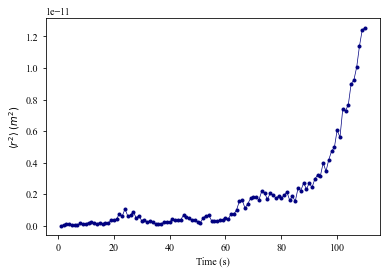

k_B = 1.3414758649390723e-24
error = 90.28372986226717 %


In [373]:
num_particles = 17  # Update based on the number of particles in your data
x_arrays = [data[f'x_{i}'][:110] for i in range(1, num_particles + 1)]
y_arrays = [data[f'y_{i}'][:110] for i in range(1, num_particles + 1)]

# Subtract the first value from each trajectory
x_arrays = [x - x[0] for x in x_arrays]
y_arrays = [y - y[0] for y in y_arrays]

#print(x_arrays)

# Calculate mean values for each time step
x_vals = np.mean(x_arrays, axis=0)
y_vals = np.mean(y_arrays, axis=0)

# Convert units
x_vals *= 1e-6
y_vals *= 1e-6

# Calculate r2
r2_vals = x_vals**2 + y_vals**2

# Plot the mean values
plt.plot(t[:110], r2_vals, c='navy', marker='o', ms=3, linewidth=0.7)
plt.xlabel('Time (s)')
plt.ylabel(r'$\langle r^2 \rangle$ $(m^2)$')
"""plt.savefig("D:/Semester 5/Lab 4/Brownian Motion/particle_ensemble.pdf", dpi = 300,
            bbox_inches="tight",
            transparent=True)"""
plt.show()

m, c = np.polyfit(t[:110], r2_vals, 1)
eta = 8.9e-4  # value from https://wiki.anton-paar.com/en/water/ at 25 degree C
a = 1.5e-6
T = 298
k_B = (6 * np.pi * eta * m * a) / (4 * T)
print('k_B =', k_B)
error = np.abs((1.380649e-23 - k_B) / 1.380649e-23) * 100
print('error =', error, '%')

## Particle ensemble corrected method 

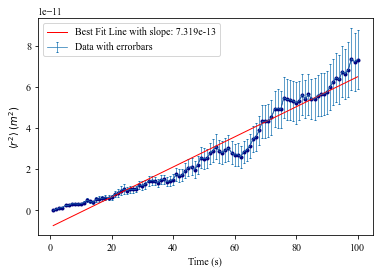

6.411363478787969e-13 7.30767206617061e-14 -1.431927053333358e-12 4.5342912726550484e-13
k_B = 1.5452090403129463e-23
error = 11.919035201050104 %
D= 1.8298737015998649e-13
delta_D= 2.085690037391152e-14
delta_kB= 1.7911421293047483e-24


In [397]:
num_particles = 17  # Update based on the number of particles in your data
x_arrays = [data[f'x_{i}'][:100] for i in range(1, num_particles + 1)]
y_arrays = [data[f'y_{i}'][:100] for i in range(1, num_particles + 1)]

# Subtract the first value from each trajectory
x_arrays = [x - x[0] for x in x_arrays]
y_arrays = [y - y[0] for y in y_arrays]

# Convert units
x_arrays = [x * 1e-6 for x in x_arrays]
y_arrays = [y * 1e-6 for y in y_arrays]

# Convert lists to NumPy arrays
x_arrays = np.array(x_arrays)
y_arrays = np.array(y_arrays)

# Calculate r^2 for each particle
r2_arrays = x_arrays**2 + y_arrays**2

std_x = np.std(x_arrays, axis=0)
std_y = np.std(y_arrays, axis=0)

delta_r_squared_slices = np.sqrt((2 * x_arrays * std_x)**2 + (2 * y_arrays * std_y)**2)

delta_r_squared_sem = np.std(delta_r_squared_slices, axis=0) / np.sqrt(num_particles)

# Calculate mean values for each time step
r2_vals = np.mean(r2_arrays, axis=0)

#delta_r_squared_sem = np.std(r2_vals, axis=0)/num_particles

# Perform linear fit
m, c = np.polyfit(t[:100], r2_vals, 1)
r2_vals_2 = [m*i + c for i in t[:100]]
# Plot the mean values
plt.errorbar(t[:100], r2_vals, yerr = delta_r_squared_sem,linewidth=0.7, capsize=1, label='Data with errorbars')
plt.plot(t[:100], r2_vals, c='navy', marker='o', ms=3, linewidth=0.7)
plt.plot(t[:100], r2_vals_2, c='r', ms=3, linewidth=1, label=f'Best Fit Line with slope: {m:.3e}')
plt.xlabel('Time (s)')
plt.ylabel(r'$\langle r^2 \rangle$ $(m^2)$')
plt.legend()
plt.savefig("D:/Semester 5/Lab 4/Brownian Motion/particle_ensemble.pdf", dpi=300,
            bbox_inches="tight",
            transparent=True)
plt.show()

slope, intercept, r, p, se = linregress(t[:10], r2_mean)
result = linregress(t[:10], r2_mean)
print(result.slope, result.stderr, result.intercept, result.intercept_stderr)

# Constants
eta = 8.9e-4  # viscosity
a = 1.5e-6    # particle radius
T = 298       # temperature

# Calculate Boltzmann constant
k_B = (6 * np.pi * eta * m * a) / (4 * T)
print('k_B =', k_B)

# Calculate error
error = np.abs((1.380649e-23 - k_B) / 1.380649e-23) * 100
print('error =', error, '%')

D = (k_B * T) / (6 * np.pi * eta * a)
print('D=',D)

delta_D = D*(result.stderr/result.slope)
print('delta_D=',delta_D)

delta_eta_perc = 0.02
delta_T = 2 
delta_kB = k_B * np.sqrt((delta_eta_perc)**2 + (delta_D/D)**2 + (delta_T/T)**2)
print('delta_kB=',delta_kB)

## Histogram Method

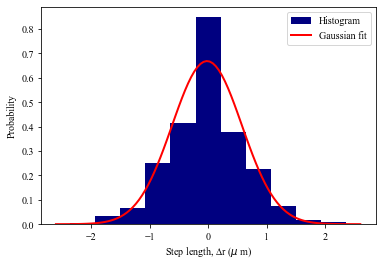

In [402]:
delta_r = all_delta_r_values

# Define the range to keep
lower_bound = -2.5e-6
upper_bound = 2.5e-6

# Create a mask to filter values within the specified range
mask = (delta_r >= lower_bound) & (delta_r <= upper_bound)

# Use boolean indexing to keep only the data within the specified range
filtered_r = delta_r[mask]

# Plot the histogram
plt.hist(filtered_r/1e-6, bins=11, density=True, color='navy', label='Histogram')
plt.xlabel('Step length, ∆r ($\mu$ m)')
plt.ylabel('Probability')

# Fit a Gaussian to the histogram
mu, std = norm.fit(filtered_r/1e-6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label='Gaussian fit')
#plt.xlim(-3e-6, 3e-6)
plt.legend()

# Save the figure
plt.savefig("D:/Semester 5/Lab 4/Brownian Motion/hist_with_fit.pdf", dpi=300,
            bbox_inches="tight",
            transparent=True)

# Show the plot
plt.show()

D= 1.1834741196652312e-13
k_B = 9.993667361218807e-24
error = 27.616161955581713 %

In [401]:
D= 1.1834741196652312e-13
k_B = 9.993667361218807e-24
delta_D = 0.001e-13
delta_eta_perc = 0.02
delta_T = 2 
delta_kB = k_B * np.sqrt((delta_eta_perc)**2 + (delta_D/D)**2 + (delta_T/T)**2)
print('delta_kB=',delta_kB)

delta_kB= 2.1099587800672817e-25


In [384]:
print(len(filtered_r))

4199


In [365]:
print(mu) #in microns
print(std**2)

0.015146911519198624
0.4733896478660926


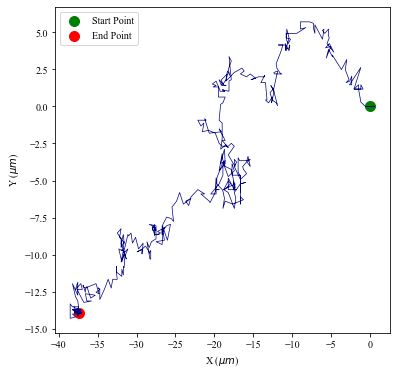

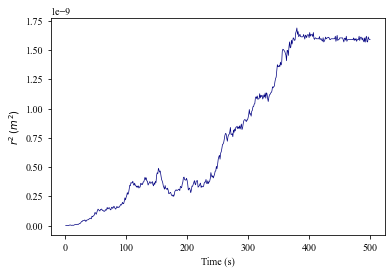

k_B = 8.387257639788143e-23


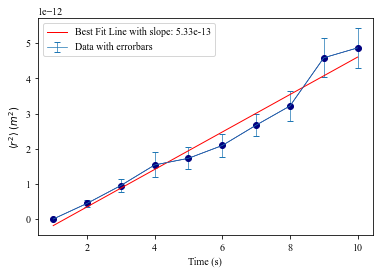

k_B= 1.1244603714386647e-23
error = 18.55566683214455 %
1.3316130106060632e-13


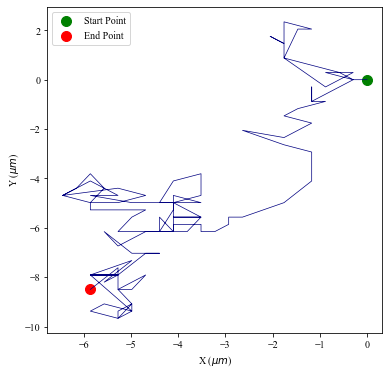

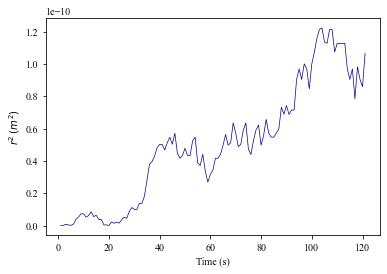

k_B = 2.06320631280481e-23


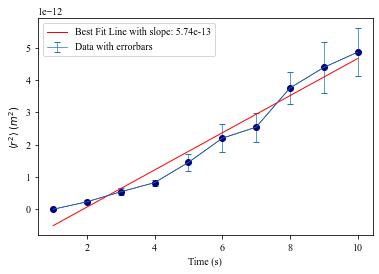

k_B= 1.212466404553849e-23
error = 12.181415801275422 %
1.4358318712121257e-13


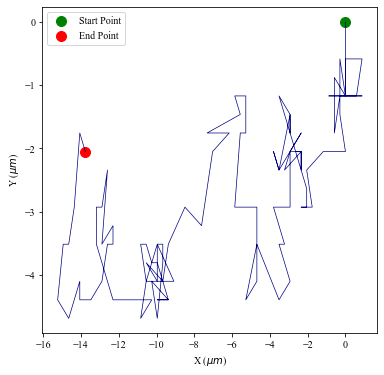

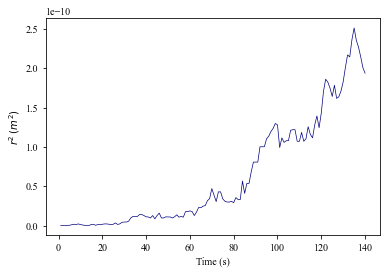

k_B = 3.312929733251152e-23


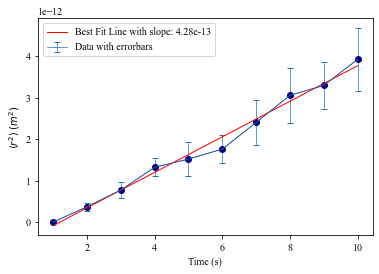

k_B= 9.045863335724379e-24
error = 34.4810785672218 %
1.0712328878787873e-13


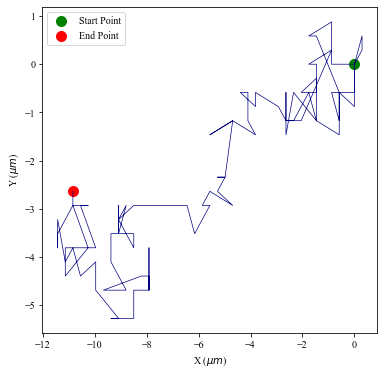

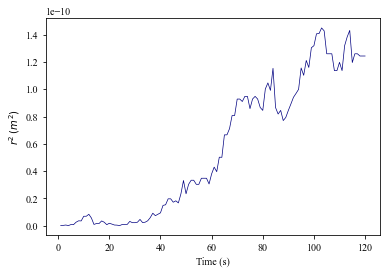

k_B = 2.9061543440284845e-23


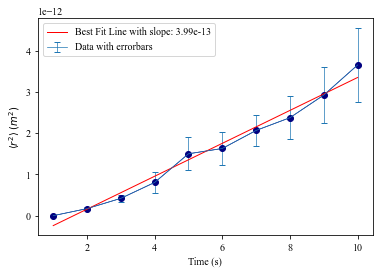

k_B= 8.430392934696135e-24
error = 38.938912535364636 %
9.983474030303028e-14


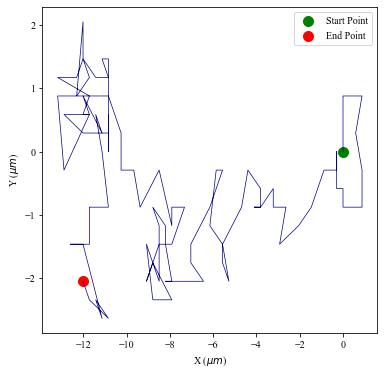

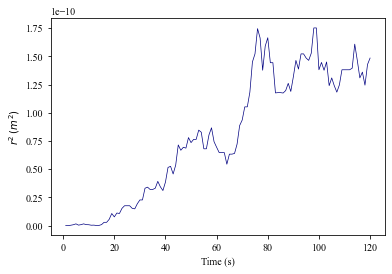

k_B = 3.2081238366522777e-23


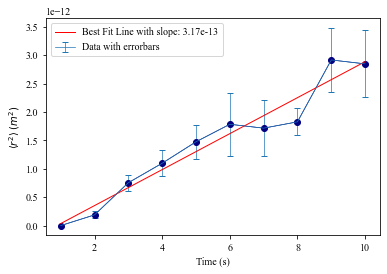

k_B= 6.68975961422298e-24
error = 51.54626835478836 %
7.92217419696967e-14


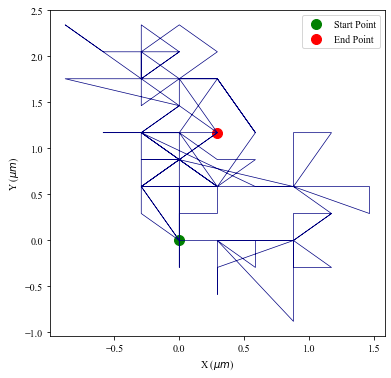

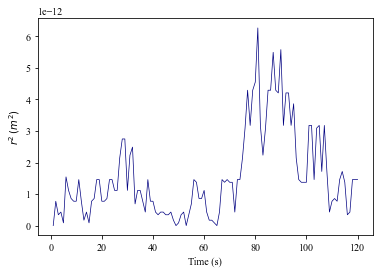

k_B = 3.520602845235115e-25


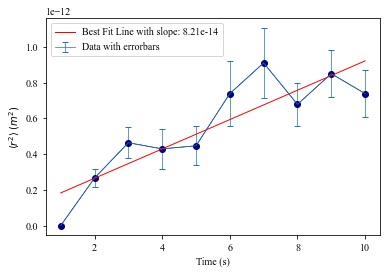

k_B= 1.732164458236205e-24
error = 87.45398390006291 %
2.051270803030295e-14


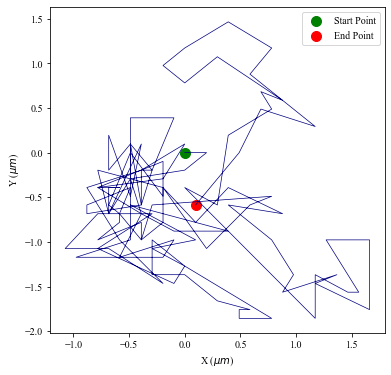

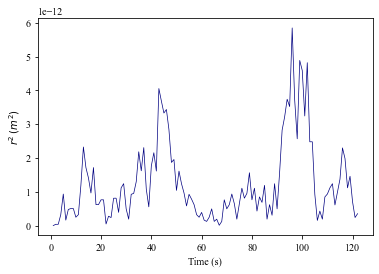

k_B = 1.7350288693630444e-25


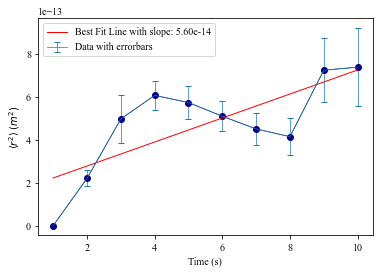

k_B= 1.1813006765222016e-24
error = 91.44387402937168 %
1.3989246666666648e-14


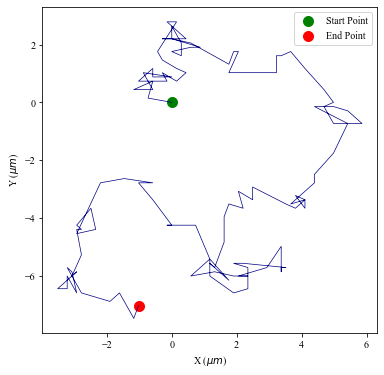

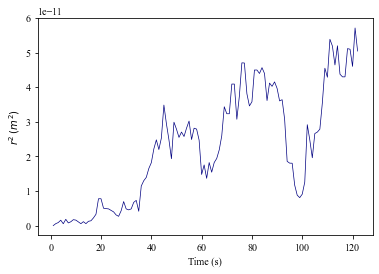

k_B = 7.929161735992959e-24


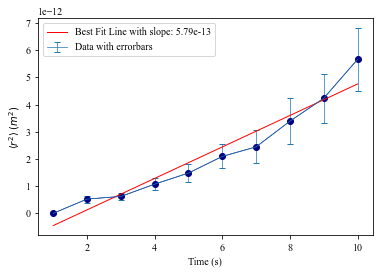

k_B= 1.2217792320377053e-23
error = 11.506890452410046 %
1.4468603454545454e-13


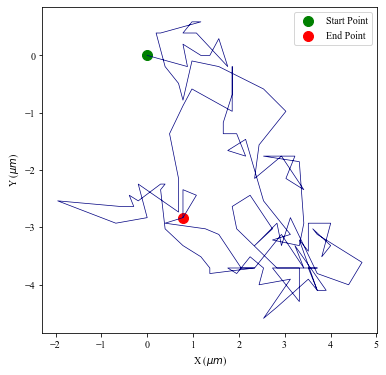

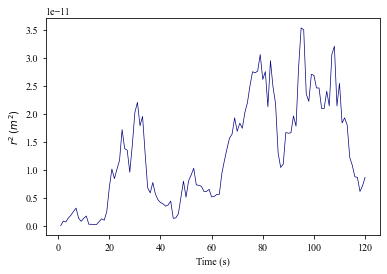

k_B = 3.796800285091405e-24


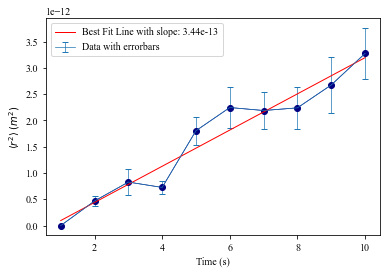

k_B= 7.265740635782724e-24
error = 47.37445479783259 %
8.6042647727272e-14


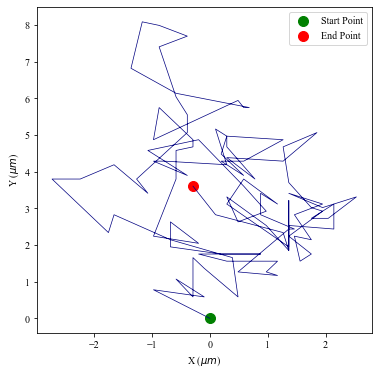

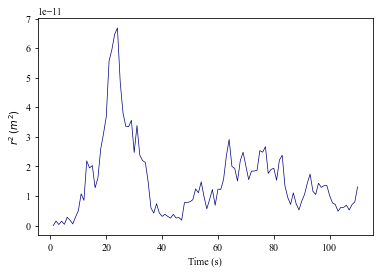

k_B = -1.5039981434933755e-24


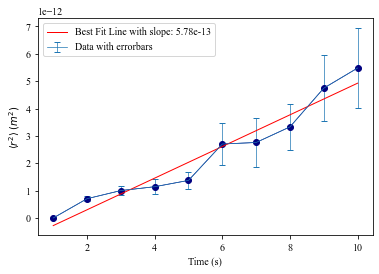

k_B= 1.2205315962477959e-23
error = 11.597256344820748 %
1.445382865151513e-13


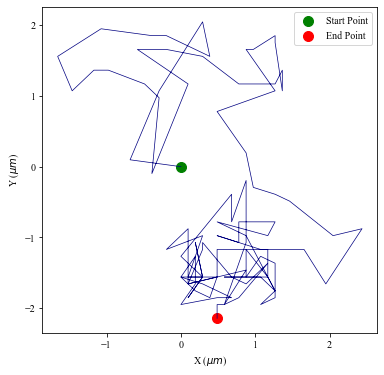

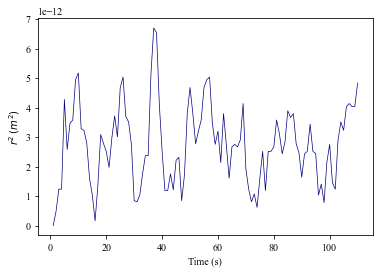

k_B = 2.0693200171209006e-26


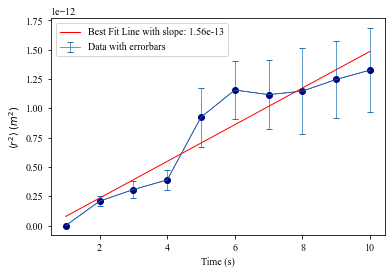

k_B= 3.3030392844513917e-24
error = 76.07618384939697 %
3.911538545454494e-14


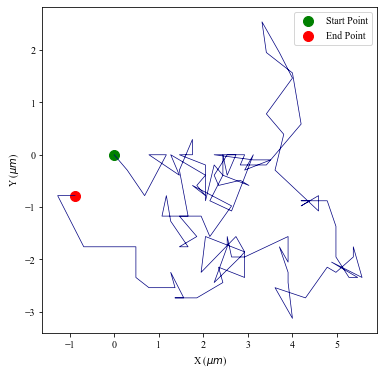

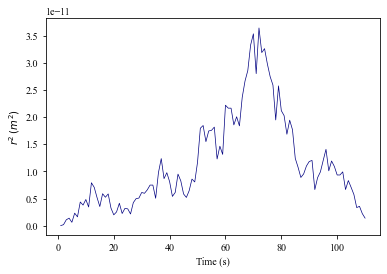

k_B = 2.4390127302547243e-24


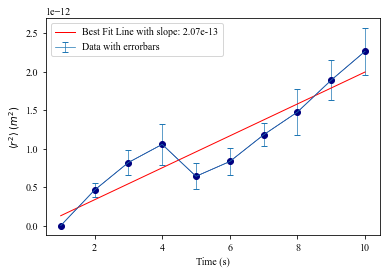

k_B= 4.3776450477539925e-24
error = 68.29284598942968 %
5.1841125303030626e-14


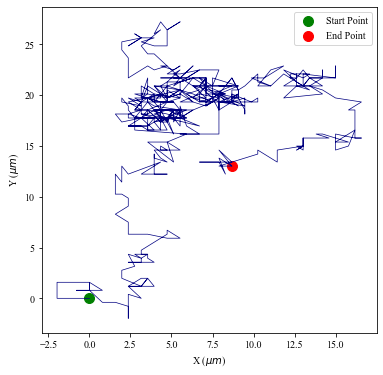

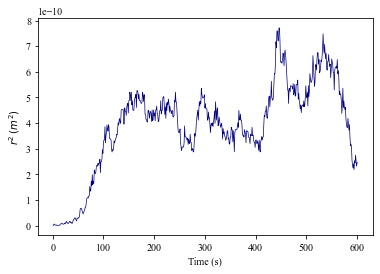

k_B = 1.439668974926942e-23


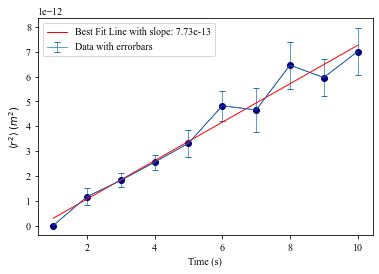

k_B= 1.6322554704399553e-23
error = 18.223782470414655 %
1.9329561772727386e-13


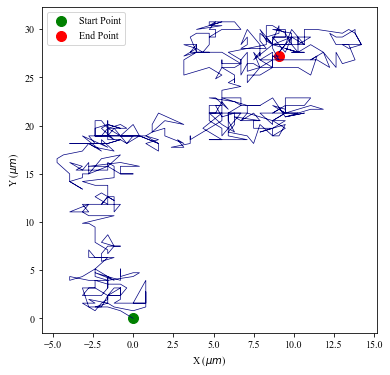

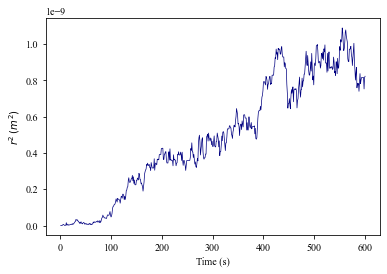

k_B = 3.754778963866689e-23


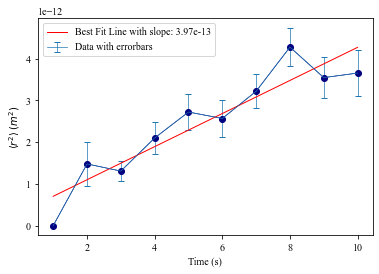

k_B= 8.375121670083356e-24
error = 39.33924067533924 %
9.918020469697008e-14


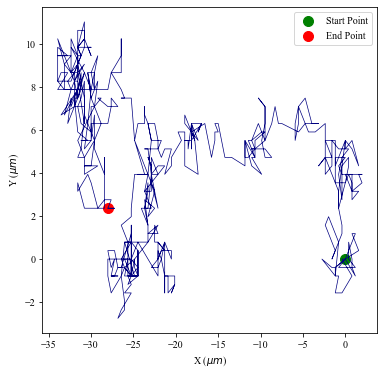

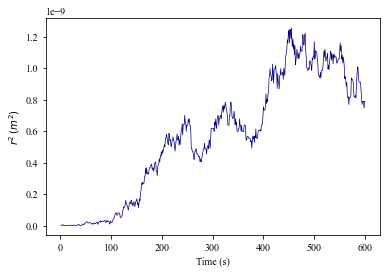

k_B = 4.350554206200088e-23


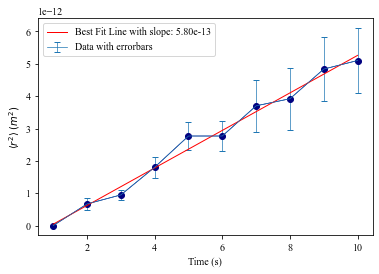

k_B= 1.2239772574487635e-23
error = 11.347688119952036 %
1.4494632999999893e-13


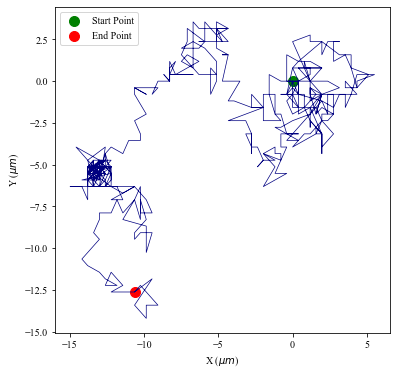

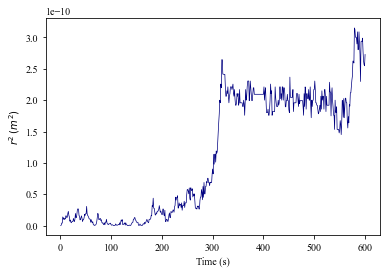

k_B = 1.050109722295534e-23


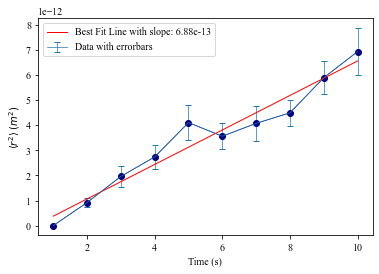

k_B= 1.451823981735081e-23
error = 5.155182941868709 %
1.719284869696972e-13


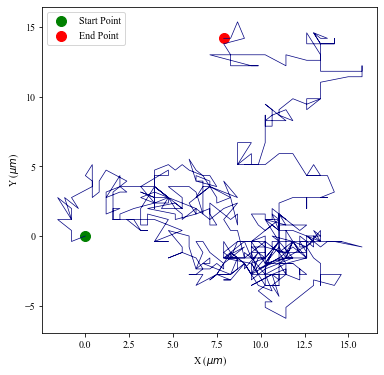

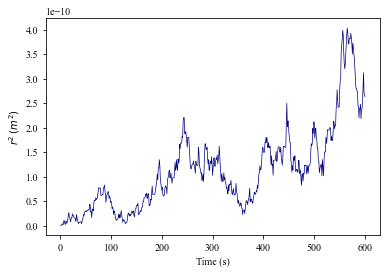

k_B = 8.219507716199833e-24


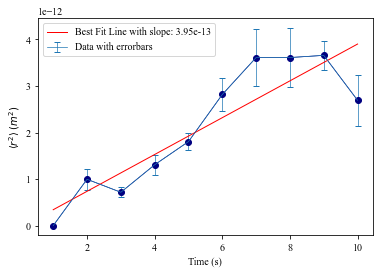

k_B= 8.349071739202217e-24
error = 39.52791955665621 %
9.887171515151521e-14


In [379]:
def analyse(*particle_paths):
    particle_data = {}

    for i, path in enumerate(particle_paths, start=1):
        column_names = [f'x_{i}', f'y_{i}']
        data = pd.read_csv(path, skiprows=1, usecols=[5, 6], header=None, names=column_names)
        particle_data[f'x_{i}'] = data[column_names[0]].values
        particle_data[f'y_{i}'] = data[column_names[1]].values

    return particle_data

def brownian_gen_and_time_analysis(x, y, t, particle_name):
    # Plot the trajectory
    # delta_rs = np.array([])
    x = x - x[0]
    y = y - y[0]
    plt.figure(figsize=(6, 6))
    plt.plot(0, 0, 'go', ms=10, label='Start Point')
    plt.plot(x[-1], y[-1], 'ro', ms=10, label='End Point')
    plt.plot(x, y, c='navy', linewidth=0.7)
    plt.xlabel('X ($\mu m$)')
    plt.ylabel('Y ($\mu m$)')
    plt.legend()
    plt.savefig(f"D:/Semester 5/Lab 4/Brownian Motion/trajectory_{particle_name}.pdf", dpi=300,
                bbox_inches="tight", transparent=True)
    plt.show()

    # Convert units
    x = x * 1e-6
    y = y * 1e-6

    # Calculate r2
    r2 = x**2 + y**2

    # r = np.sqrt(r2)
    delta_r = np.diff(x)
    # print('delta_x =', ', '.join(map(str, delta_x)))

    # Plot r2 over time
    plt.plot(t[:len(r2)], r2, c='navy', linewidth=0.7)
    plt.xlabel('Time (s)')
    plt.ylabel(r'$r^2$ $(m^2)$')
    plt.show()

    # Fit a linear function to obtain m and c
    m, c = np.polyfit(t[:len(r2)], r2, 1)

    # Calculate k_B
    eta = 8.9e-4  # viscosity
    a = 1.5e-6  # particle radius
    T = 298  # temperature
    k_B = (6 * np.pi * eta * m * a) / (4 * T)
    print('k_B =', k_B)

    # Divide data into slices
    num_slices = 10

    # Use list comprehension to create the slices
    x_slices = [x[i * 10: (i + 1) * 10] for i in range(num_slices)]
    y_slices = [y[i * 10: (i + 1) * 10] for i in range(num_slices)]

    # Convert the list to a NumPy array
    x_vals = np.array(x_slices)
    y_vals = np.array(y_slices)

    # Subtract the first value of each slice from the entire slice
    x_vals -= x_vals[:, :1]
    y_vals -= y_vals[:, :1]

    std_x = np.std(x_vals, axis=0)
    std_y = np.std(y_vals, axis=0)

    # Calculate r2_vals
    r2_vals = x_vals**2 + y_vals**2

    std_r2 = np.std(r2_vals, axis=0) / np.sqrt(num_slices)

    delta_r_squared_slices = np.sqrt((2 * x_vals * std_x)**2 + (2 * y_vals * std_y)**2)

    # Calculate the mean and standard deviation of delta_r_squared
    delta_r_squared_mean = np.mean(delta_r_squared_slices, axis=0)
    delta_r_squared_sem = np.std(delta_r_squared_slices, axis=0) / np.sqrt(num_slices)

    # Print or plot the results as needed
    # print(r2_vals)
    r2_mean = np.mean(r2_vals, axis=0)

    m, c = np.polyfit(t[:10], r2_mean, 1)
    r2_mean_2 = [m * i + c for i in t[:10]]
    # Plot the mean values
    plt.errorbar(t[:10], r2_mean, yerr=delta_r_squared_sem, linewidth=0.7, label='Data with errorbars', capsize=3)
    plt.plot(t[:10], r2_mean, c='navy', marker='o', linewidth=0.7)
    plt.plot(t[:10], r2_mean_2, c='r', linewidth=1, label=f'Best Fit Line with slope: {m:.2e}')
    plt.xlabel('Time (s)')
    plt.ylabel(r'$\langle r^2 \rangle$ $(m^2)$')
    plt.legend()
    plt.savefig(f"D:/Semester 5/Lab 4/Brownian Motion/time_ensemble_{particle_name}.pdf", dpi=300,
                bbox_inches="tight", transparent=True)
    plt.show()

    eta = 8.9e-4  # value from https://wiki.anton-paar.com/en/water/ at 25 degree C
    a = 1.5e-6
    T = 298
    k_B = (6 * np.pi * eta * m * a) / (4 * T)
    print('k_B=', k_B)
    error = np.abs((1.380649e-23 - k_B) / 1.380649e-23) * 100
    print('error =', error, '%')
    D = (k_B * T) / (6 * np.pi * eta * a)
    print(D)

    return delta_r

# Example usage:
particle_names = [f'{i}' for i in range(1, 18)]
particle_paths = [f'path_to_particle_{i}_data.csv' for i in range(1, 18)]

for particle_name, particle_path in zip(particle_names, particle_paths):
    x_data = data[f'x_{particle_name}']
    y_data = data[f'y_{particle_name}']
    brownian_gen_and_time_analysis(x_data, y_data, t, particle_name)
